# Importing required libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.graph_objs as go

# Read first dataset

In [75]:
matches = pd.read_csv('/kaggle/input/tsf-datasets/matches.csv')

In [76]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [77]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


# Statistical Analysis of matches Dataset(first)

In [78]:
matches.shape

(756, 18)

In [79]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [80]:
matches.size

13608

In [81]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [82]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [83]:
matches.id.is_unique

True

#  Data Cleaning for First dataset

In [84]:
#number of isnull data
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [85]:
#Percentage of NAN Values 
per_Nan = [(c, matches[c].isna().mean()*100) for c in matches]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])


In [86]:
per_Nan

,column_name,Percentage
0,id,0.000000
1,season,0.000000
2,city,0.925926
3,date,0.000000
4,team1,0.000000
5,team2,0.000000
6,toss_winner,0.000000
7,toss_decision,0.000000
8,result,0.000000
9,dl_applied,0.000000


In [87]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [88]:
#So, missing values can be filled with Dubai
matches.city = matches.city.fillna('Dubai')

In [89]:
#umpire1 and umpire2 columns have one missing value each
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [90]:
# Umpire3 column has close to 92% missing values. hence dropping that column
matches = matches.drop('umpire3', axis = 1)

In [91]:
print("Total number of duplicate data: ",matches.duplicated().sum())

Total number of duplicate data:  0


In [92]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [93]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Read Second Dataset

In [94]:
#Read Second Dataset
deliveries = pd.read_csv("/kaggle/input/tsf-datasets/deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [95]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [96]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Exploratory Data Analysis(EDA)

### 1.Number of Matches in Each Season

In [97]:
matches['season'].value_counts().head()

season
2013    76
2012    74
2011    73
2010    60
2014    60
Name: count, dtype: int64

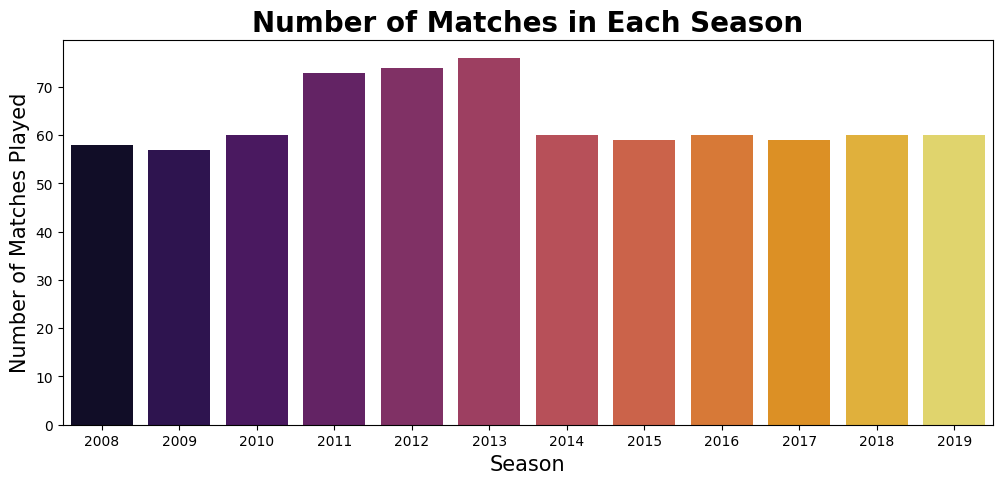

In [98]:
 #Number of matches in the season.
# lets see how many matches are being played every season
plt.subplots(figsize=(12,5))
sns.countplot(x = 'season', data = matches, palette = 'inferno')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Number of Matches Played',fontsize=15)
plt.title('Number of Matches in Each Season',fontsize=20,fontweight="bold")
plt.show()

### 2. Number of matches played by each team.

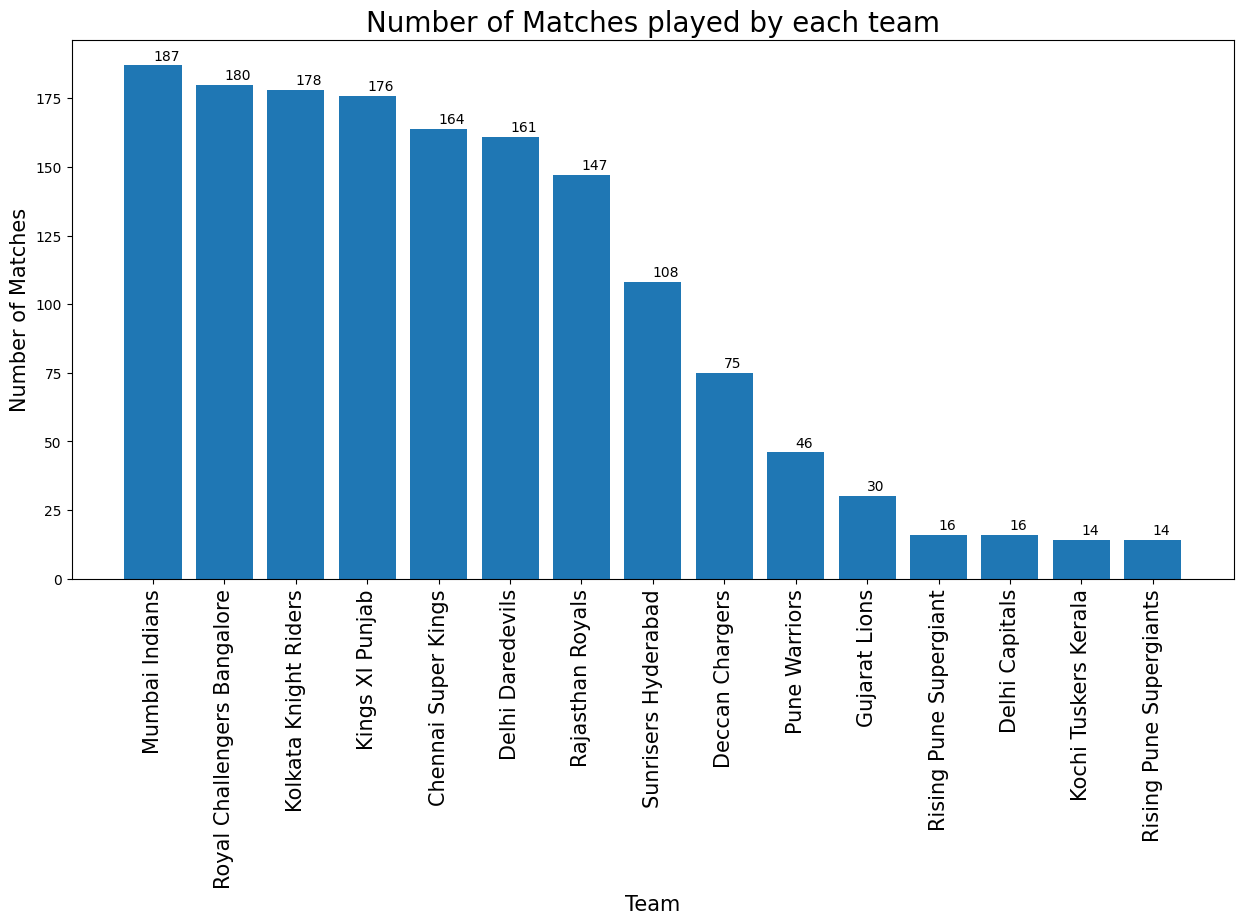

In [99]:
#2. Number of matches played by each team.
num_matches = pd.concat([matches['team1'], matches['team2']])

num_matches = num_matches.value_counts()

plt.figure(figsize=(15,7))
plt.bar(x=num_matches.index, height=num_matches.values)
plt.title('Number of Matches played by each team',fontsize=20)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xticks(rotation=90,fontsize=15)

for i,v in enumerate(num_matches.values):
    plt.text(x=i, y=v+2, s=v)
    
plt.show()

### 3.Number of teams participated in each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

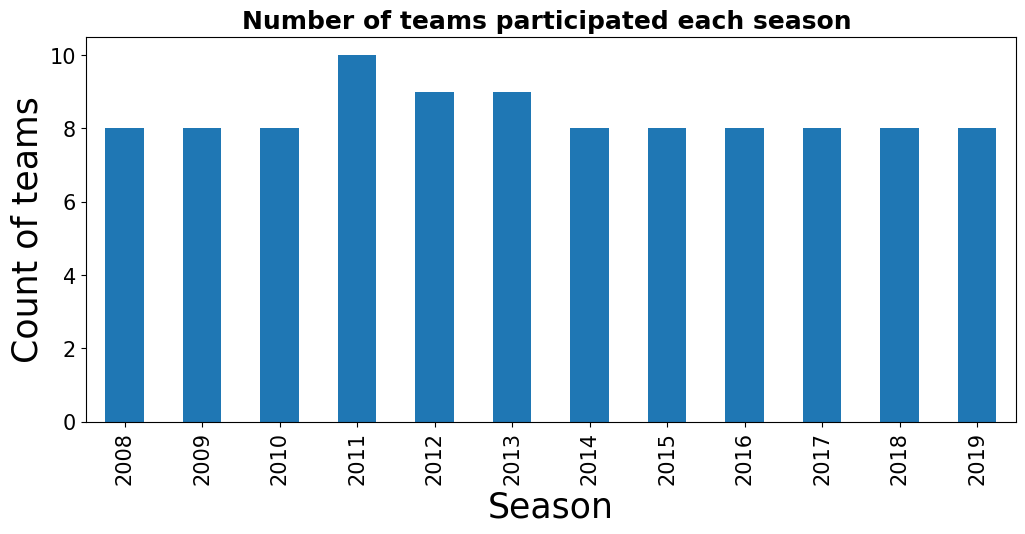

In [100]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(12,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### 4.Venue which has hosted most number of IPL matches 

Text(0.5, 0, 'Frequency')

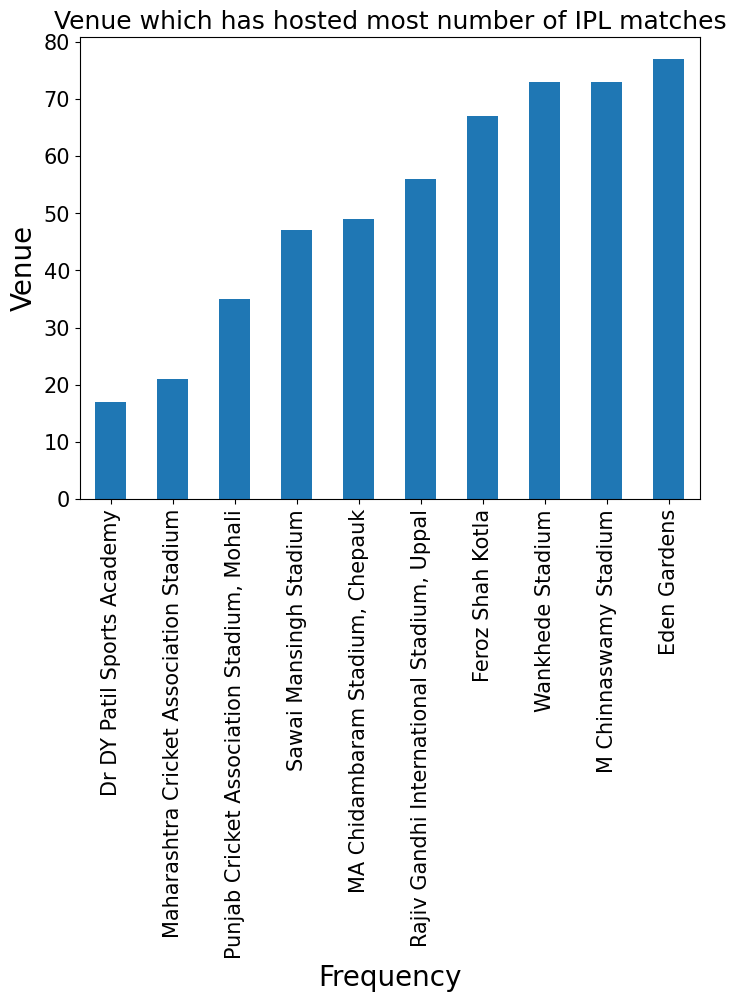

In [101]:
#Venue which has hosted most number of IPL matches .
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar',figsize=(8,6), fontsize=15)
plt.title("Venue which has hosted most number of IPL matches",fontsize=18)
plt.ylabel("Venue", size = 20)
plt.xlabel("Frequency", size = 20)


### 5.Visualization of the total number of matches won by the teams for all seasons.

In [102]:
winner_by_season = matches.groupby('season')['winner'].value_counts()

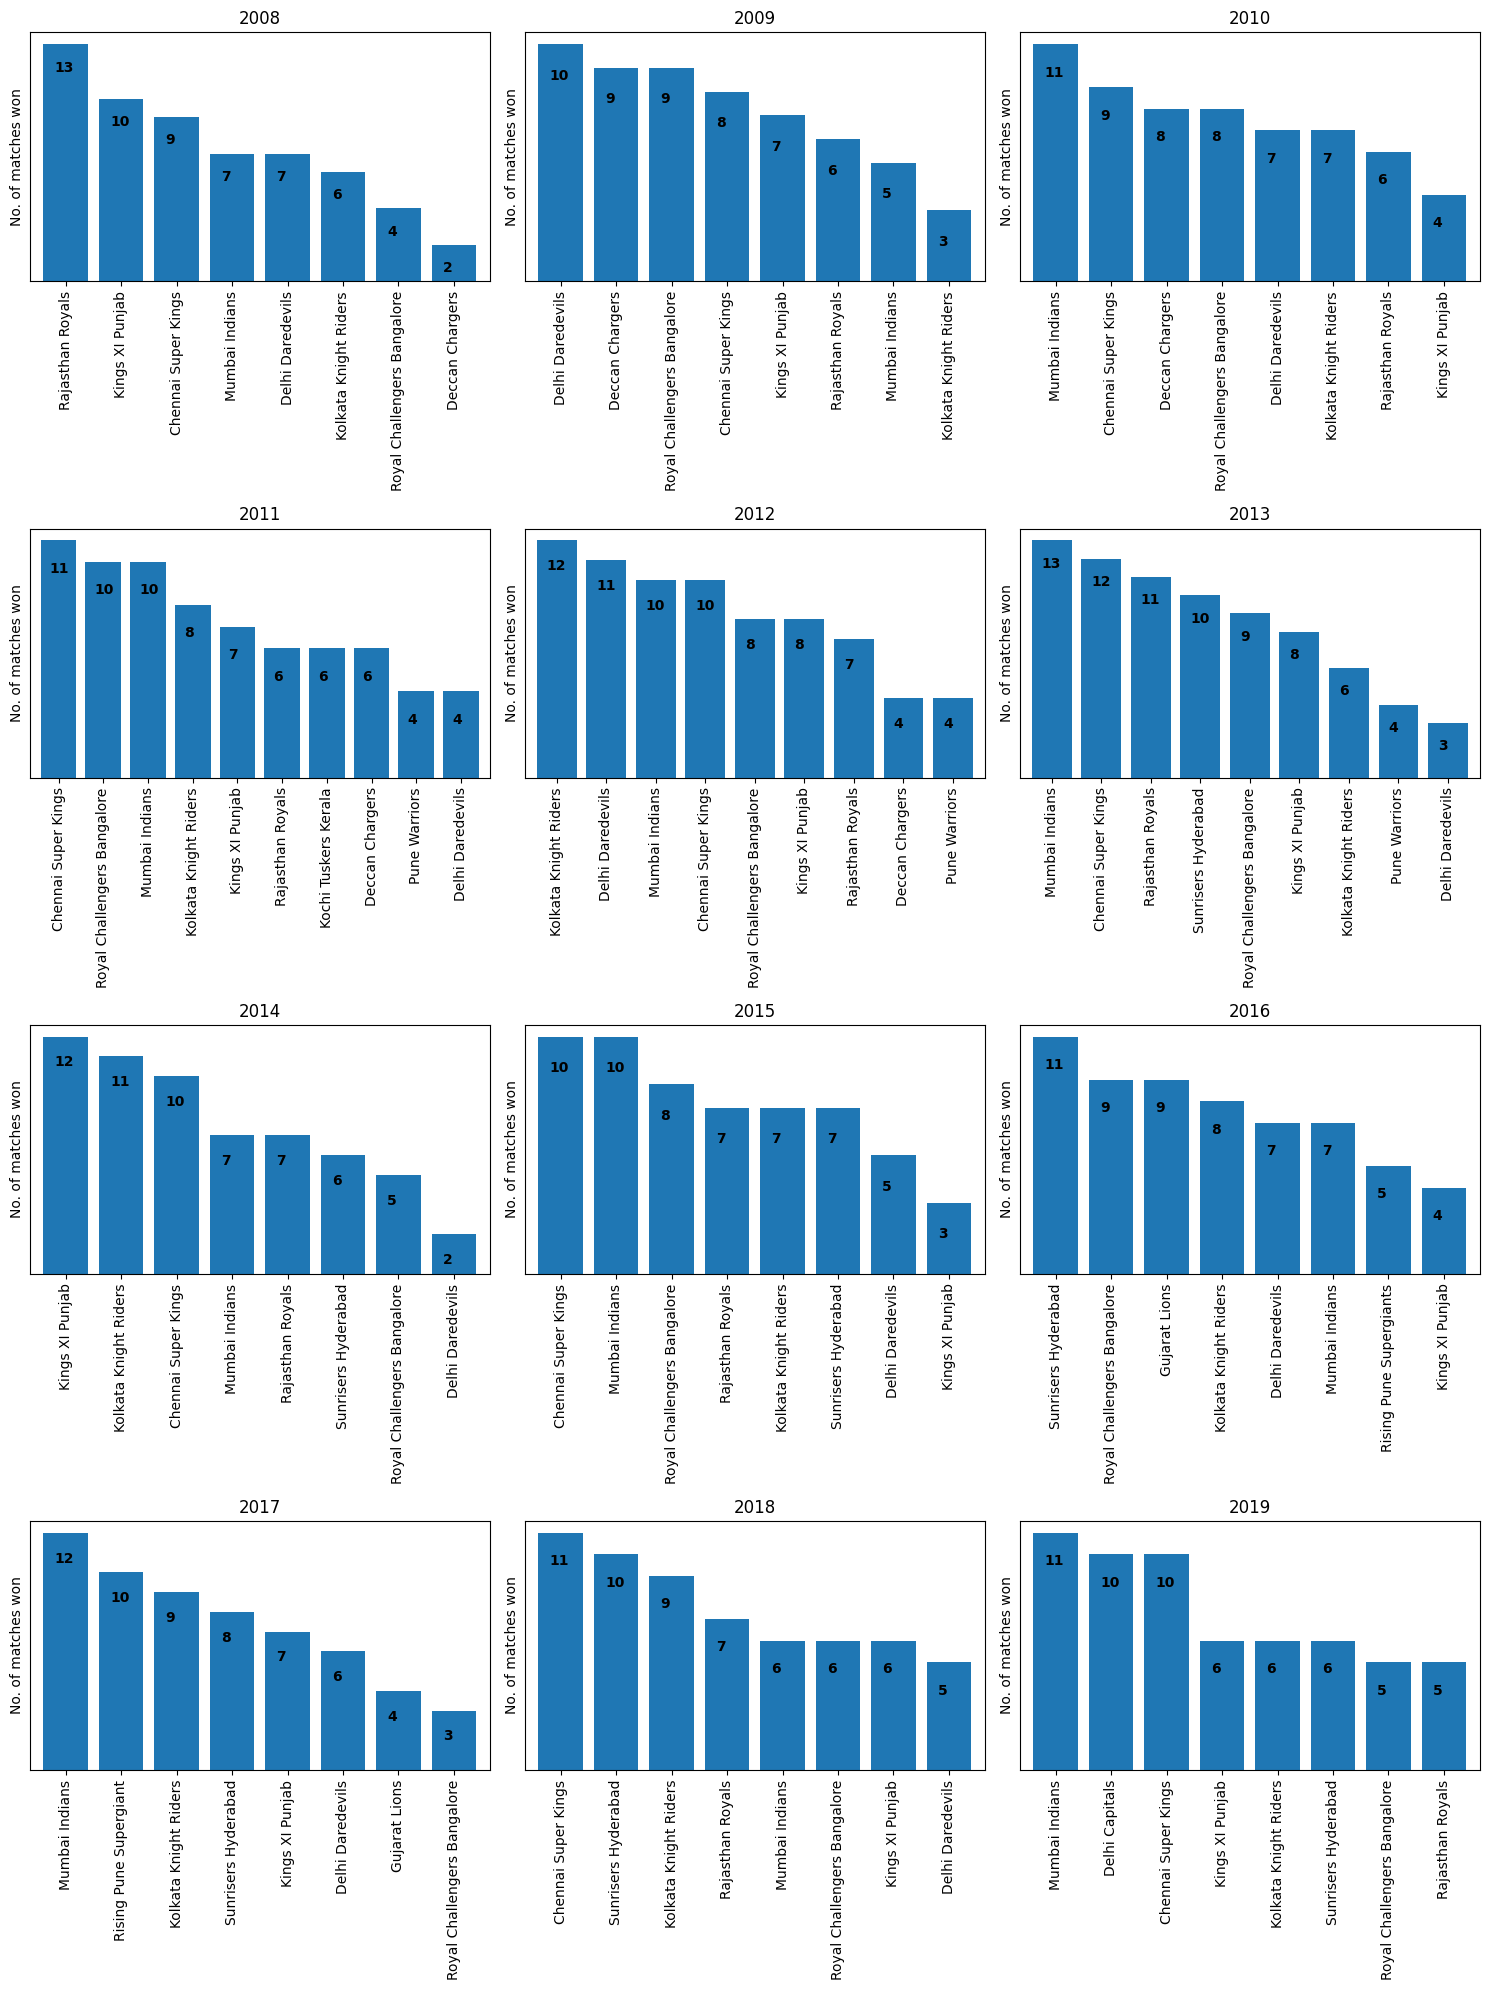

In [103]:
groups = winner_by_season.groupby('season')
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (15,20), width = 0.8)
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('No. of matches won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

### 6.Champion in each season

In [104]:
season_winner = matches.drop_duplicates('season', keep='last')
season_winner = season_winner[['season', 'winner']]
season_winner.sort_values('season',inplace=True)
season_winner.reset_index(inplace=True, drop=True)
season_winner

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


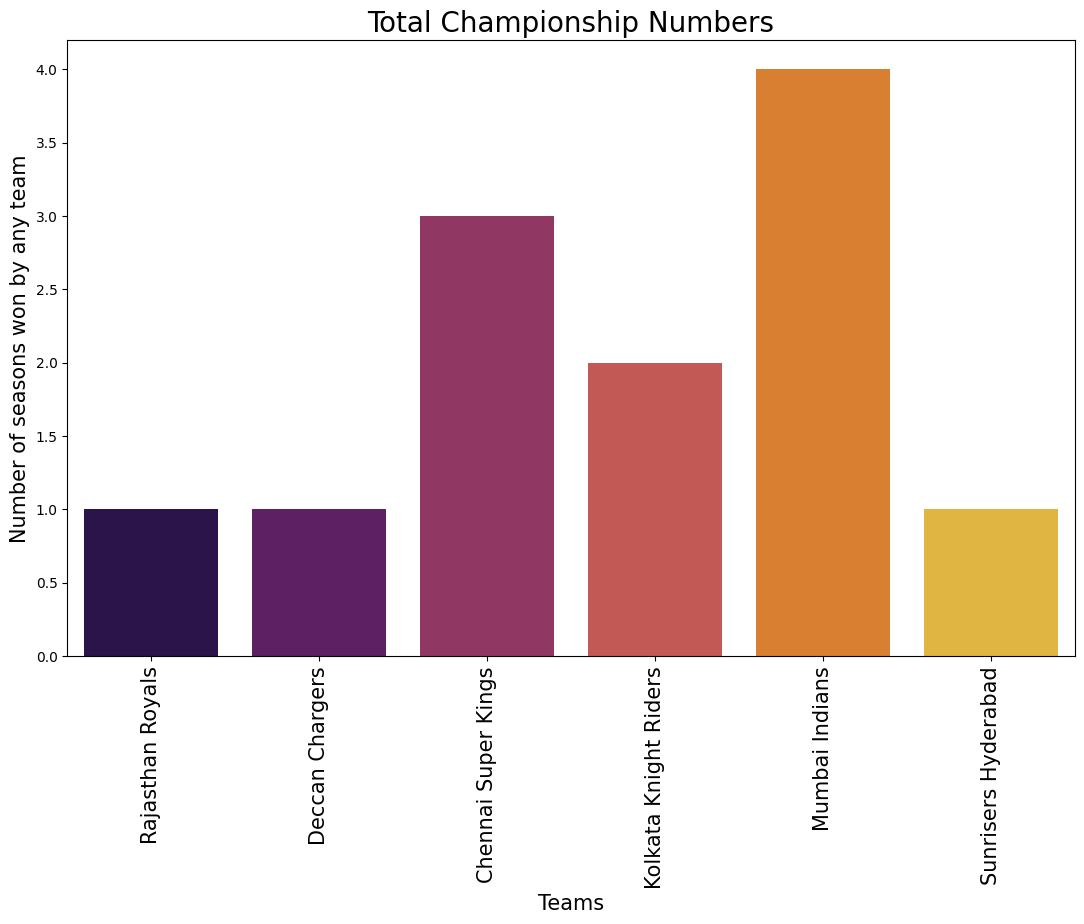

In [105]:
plt.subplots(figsize=(13,8))
sns.countplot(x='winner', data = season_winner, palette = 'inferno')
plt.xlabel('Teams',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Number of seasons won by any team',fontsize=15)
plt.title('Total Championship Numbers',fontsize=20)
plt.show()

### 7.Visualizing the number of matches held in each city.

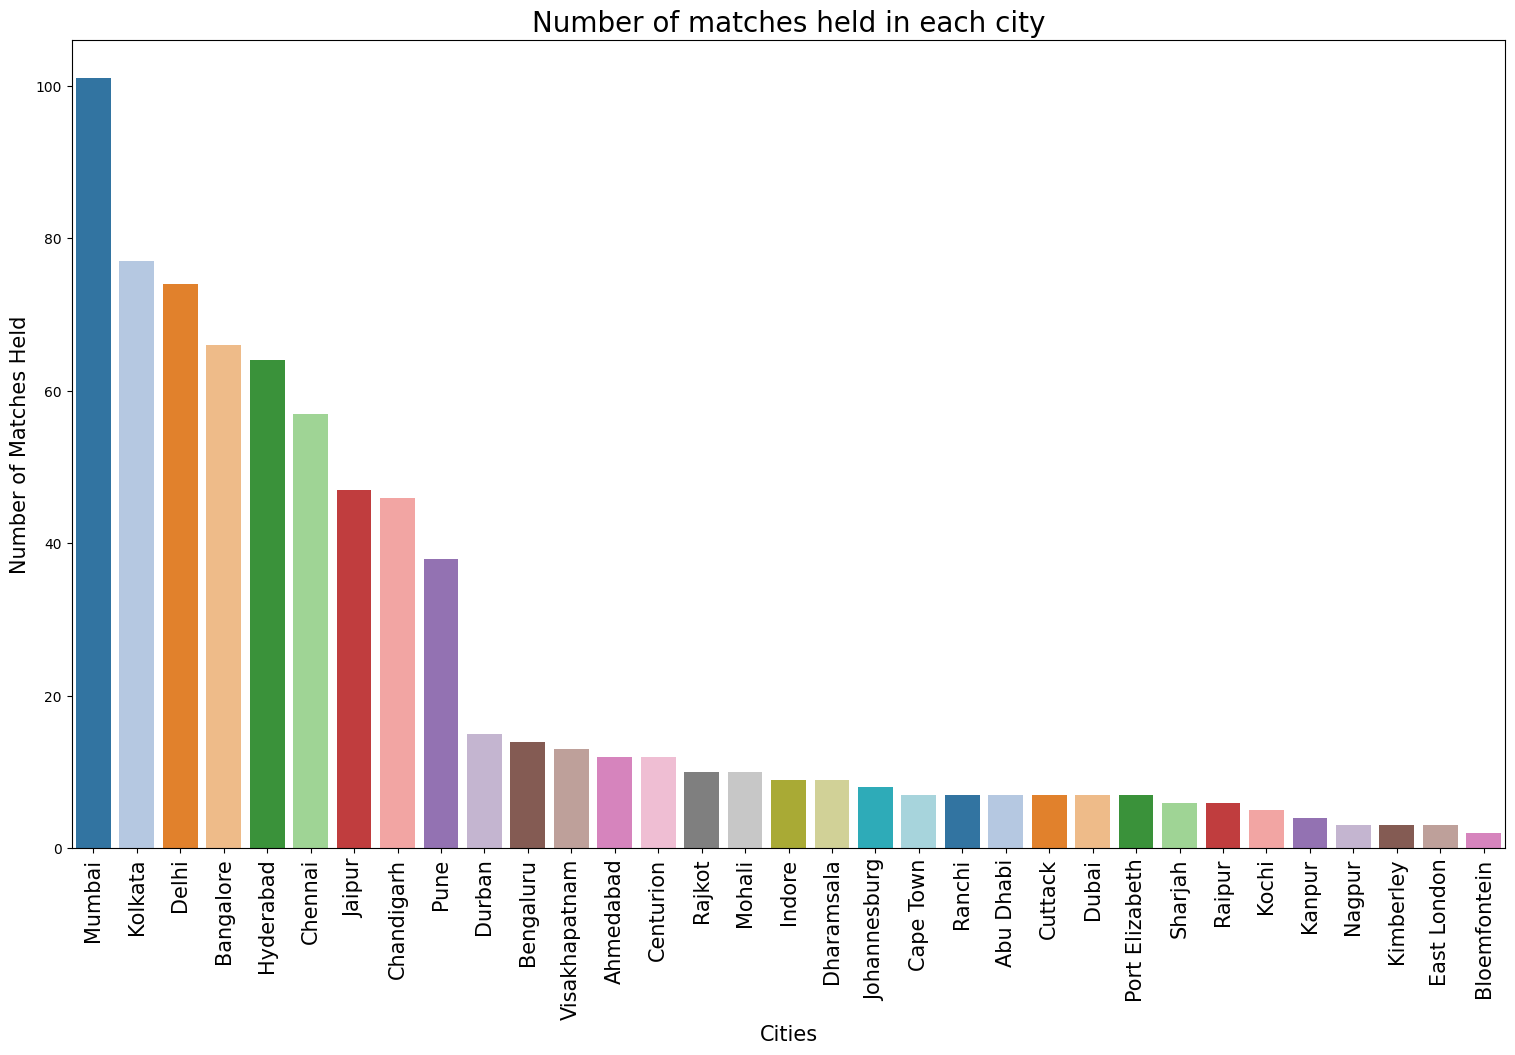

In [106]:
#Visualizing the number of matches held in each city.
# Visualizing how many matches were played in which city.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'city', data = matches, palette = 'tab20', order=matches['city'].value_counts().index)
plt.ylabel('Number of Matches Held',fontsize=15)
plt.title('Number of matches held in each city',fontsize=20)
plt.xlabel('Cities',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

### 8.Plot to visualise the top 10 players based on the number of MOM awards won

In [107]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=matches['player_of_match'].value_counts()[:10]
mom

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64

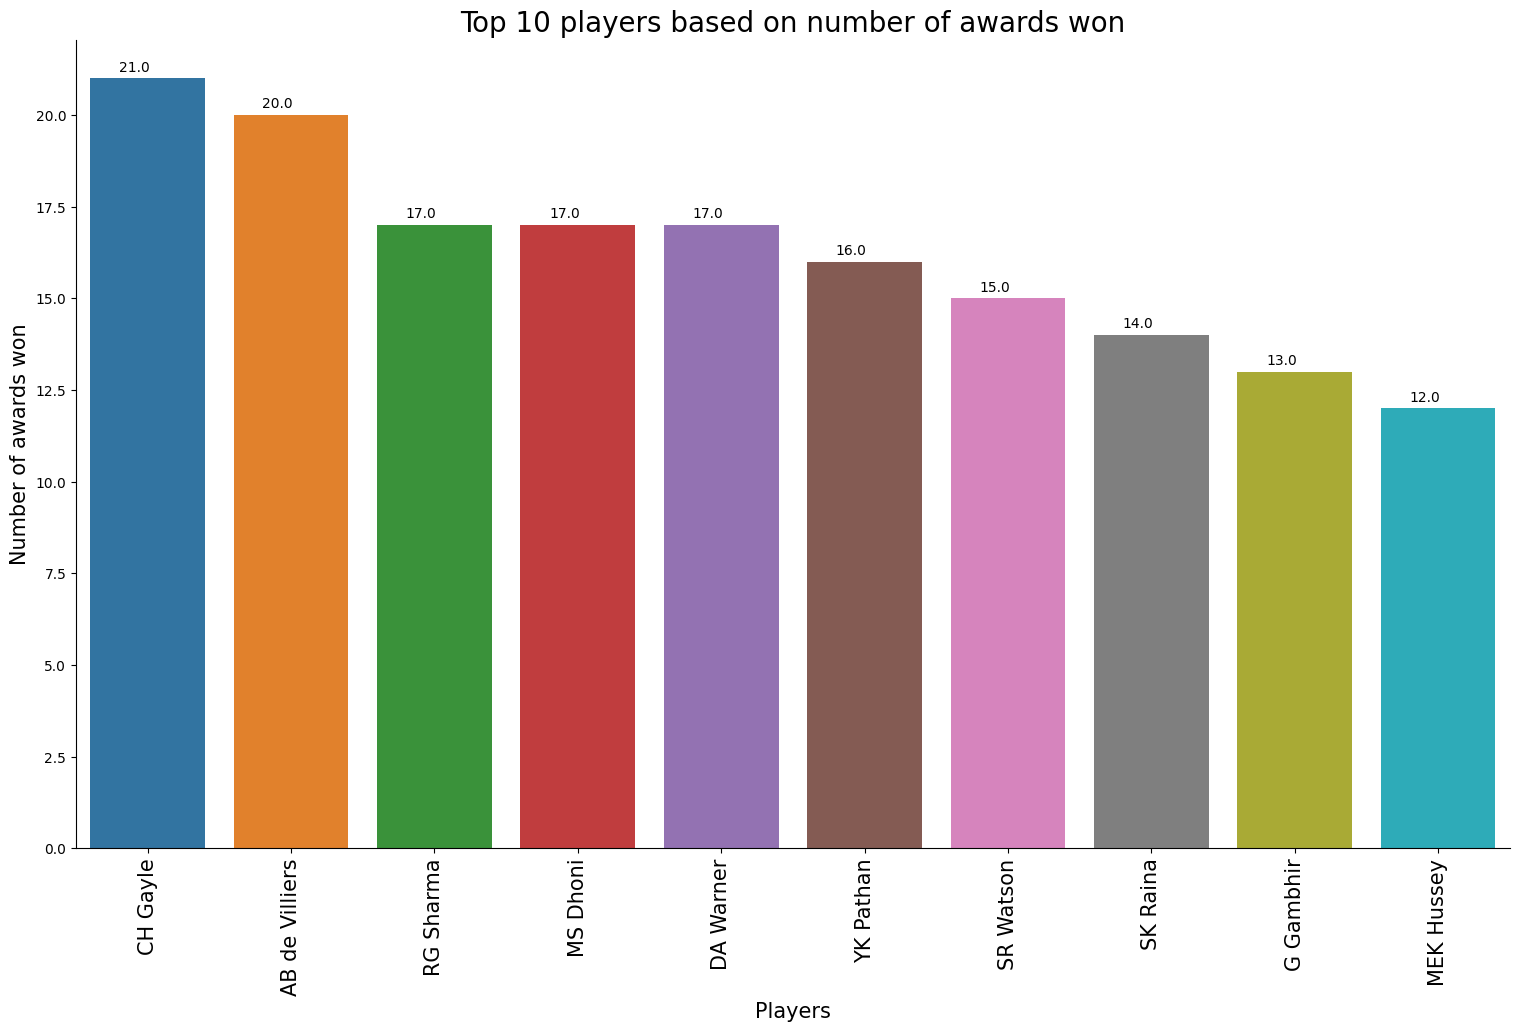

In [108]:

# Plot to visualise the top 10 players based on the number of MOM awards won
plt.subplots(figsize=(18.5,10.5))
ax = sns.barplot(x = mom.index, y = mom,orient='v', palette = 'tab10')
plt.ylabel('Number of awards won',fontsize=15)
plt.title('Top 10 players based on number of awards won',fontsize=20)
plt.xlabel('Players',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.2))       
plt.show()

 ### 9.Visualizing the number of matches held in each venues.

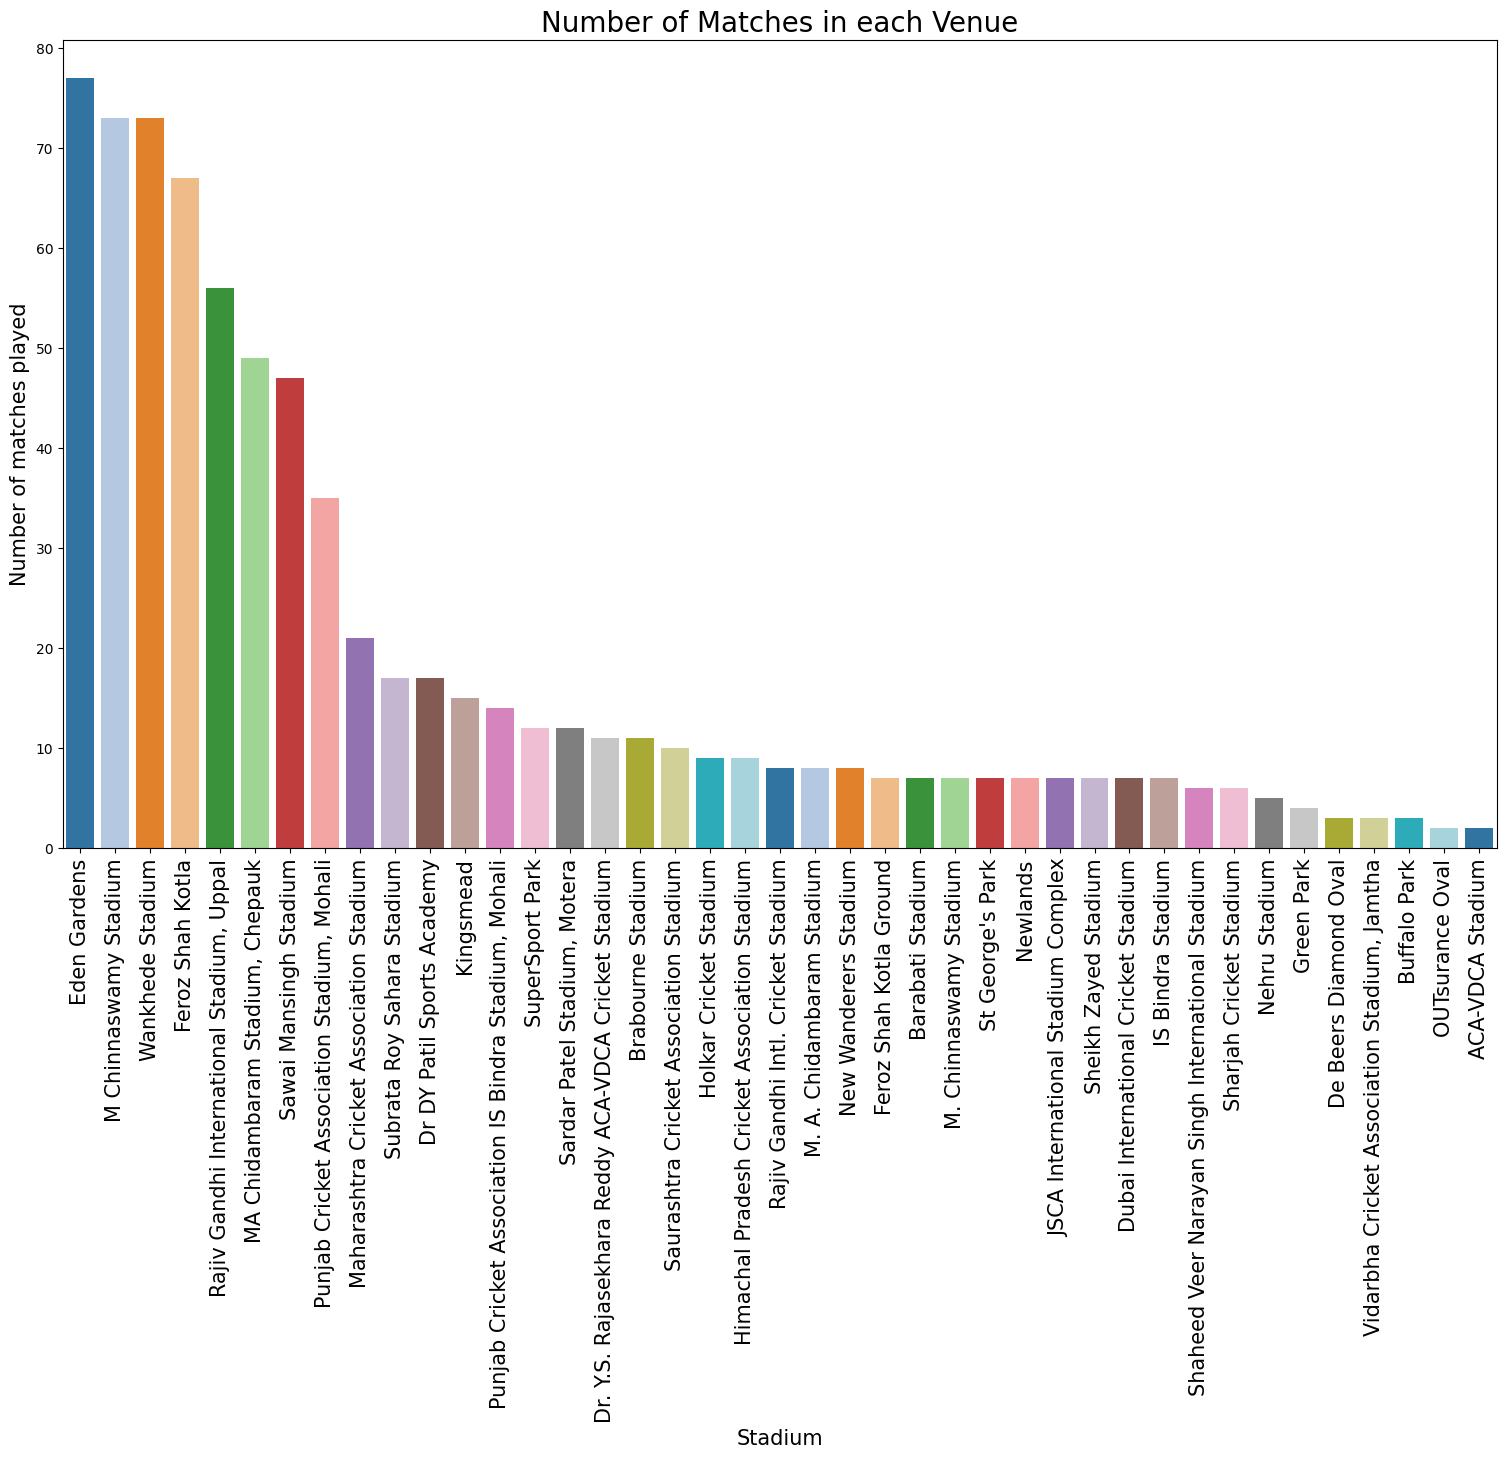

In [109]:

# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'venue', data = matches, palette = 'tab20', order=matches['venue'].value_counts().index)
plt.ylabel('Number of matches played',fontsize=15)
plt.title('Number of Matches in each Venue',fontsize=20)
plt.xlabel('Stadium',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

### 10.Observing the effect of the field situation on the winning for the 10 stadiums with the most matches

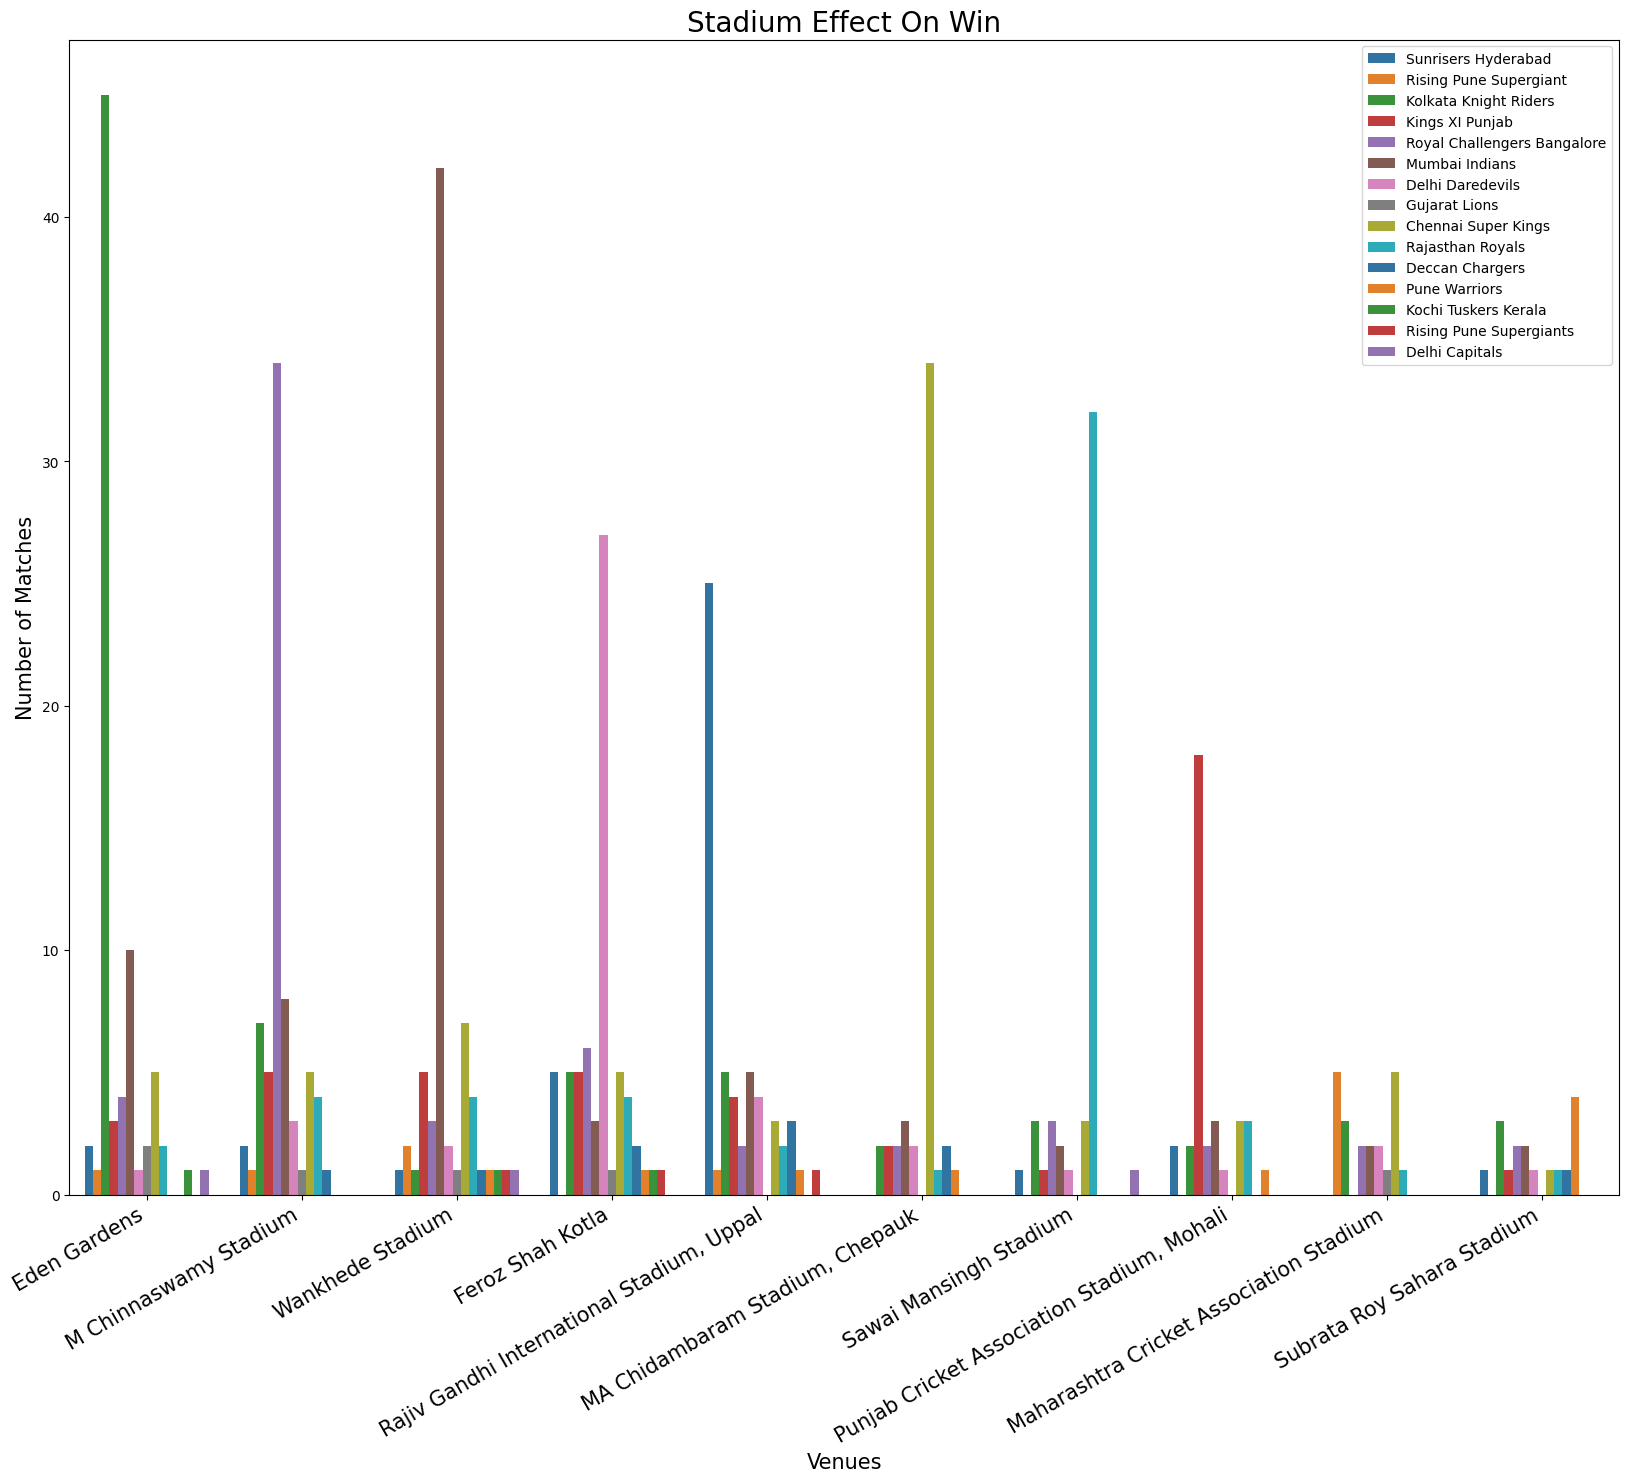

In [110]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='venue', data = matches, hue = 'winner',order=matches['venue'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Venues',fontsize=15)
plt.title('Stadium Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### 11.Observing the effect of the field situation on the winning for the 10 cities with the most matches

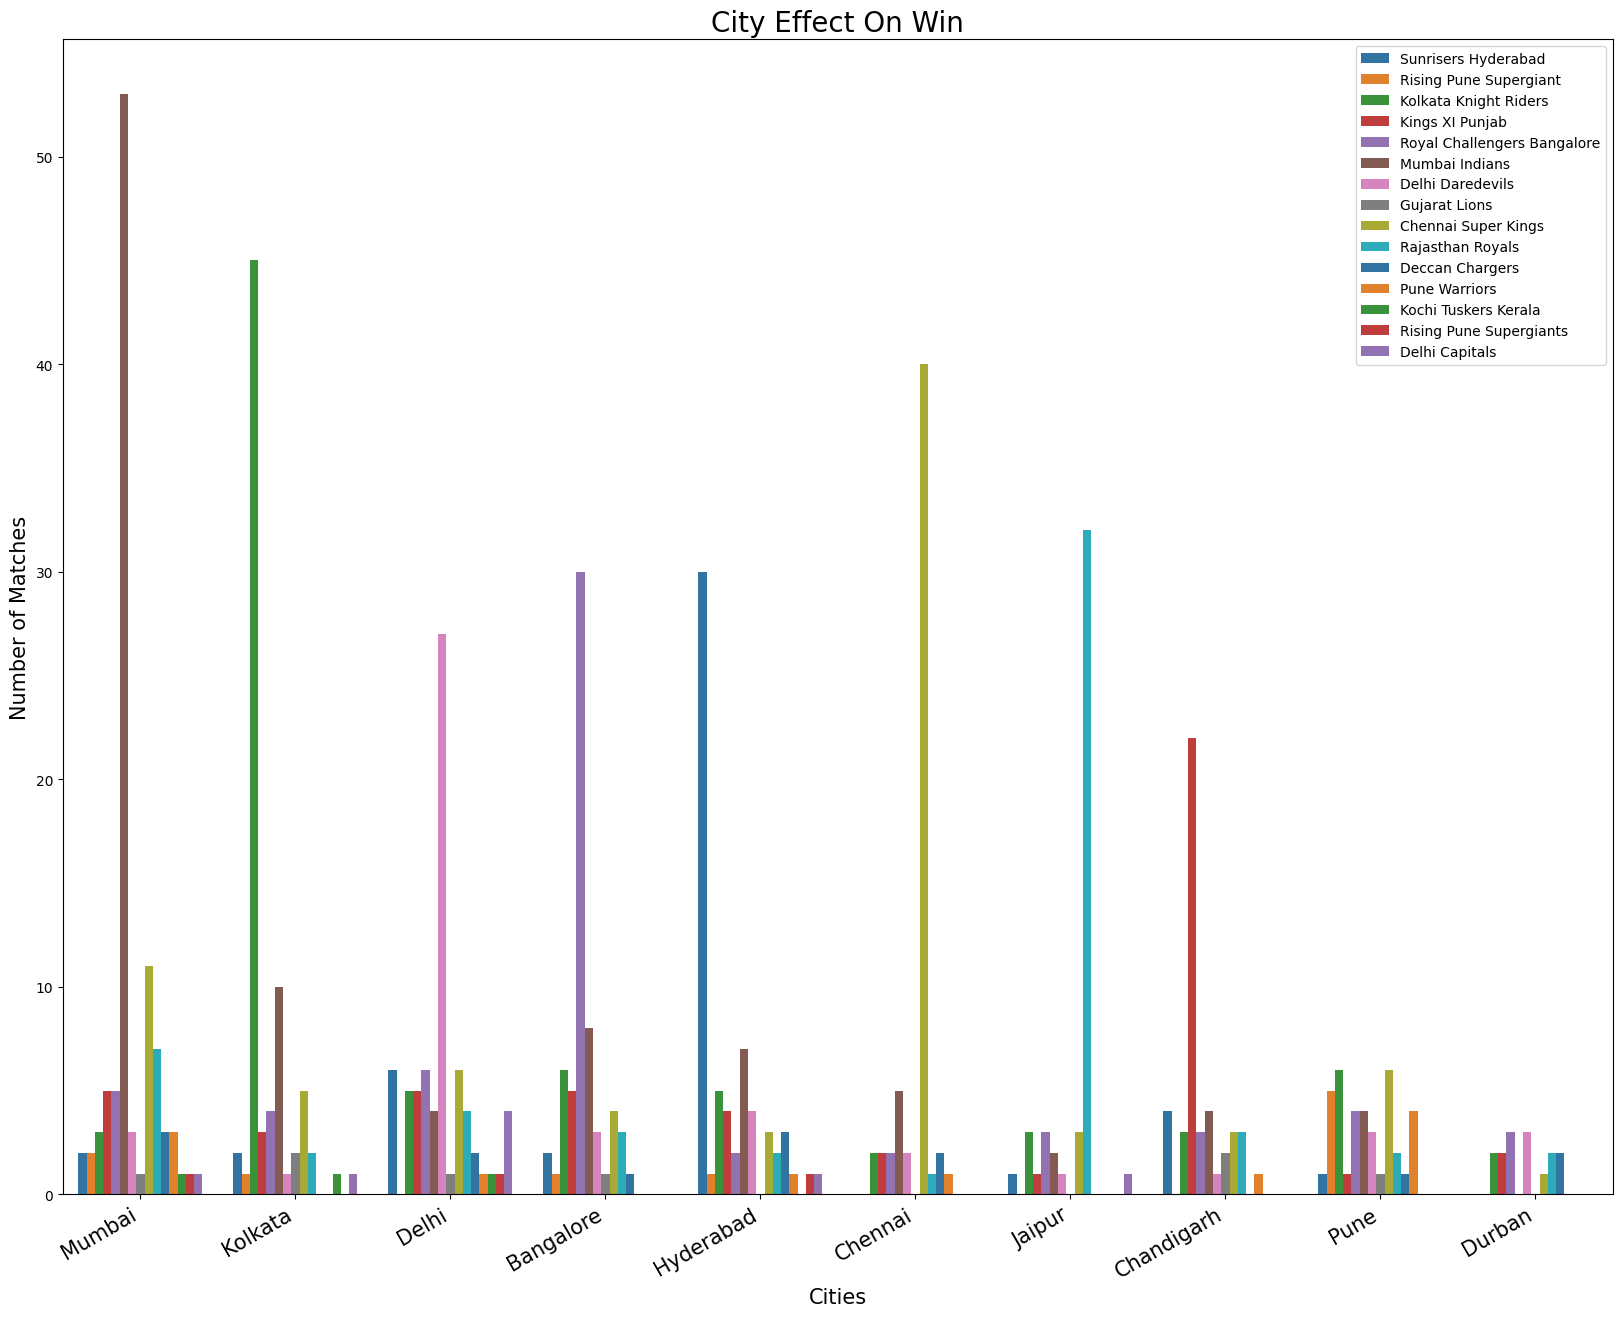

In [111]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='city', data = matches, hue = 'winner',order=matches['city'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.title('City Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### 12.Number of wins according to Toss Decision

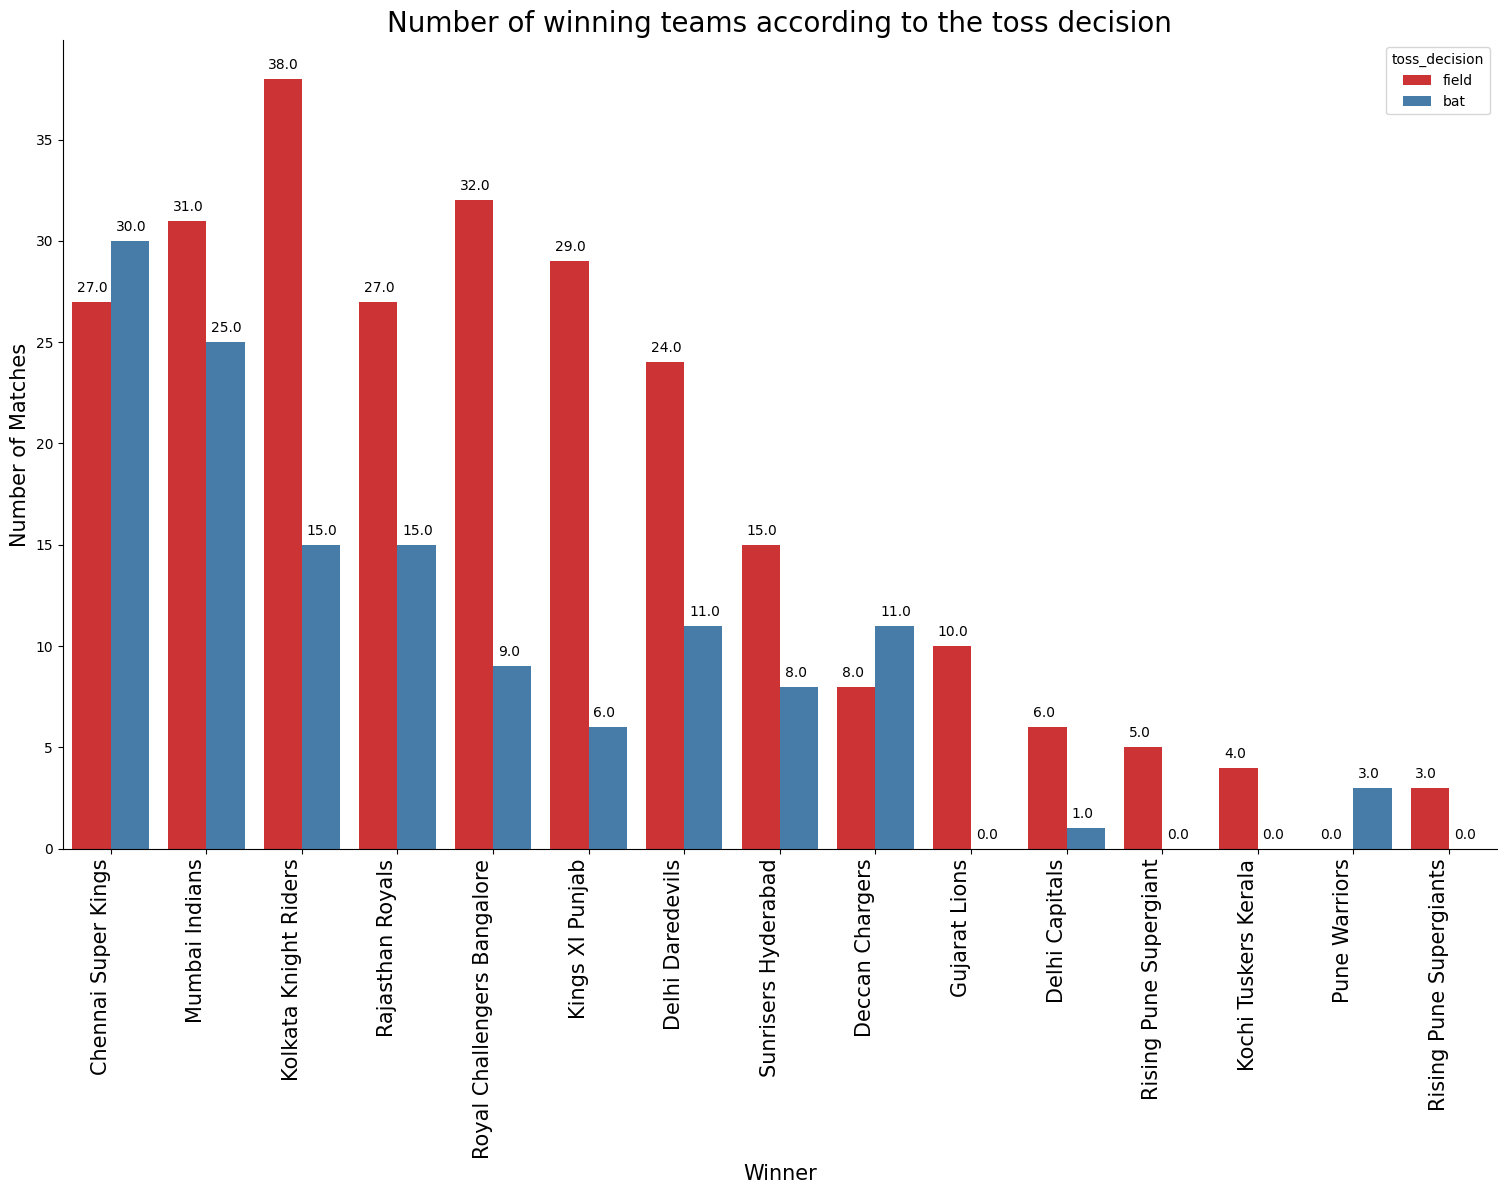

In [112]:

plt.subplots(figsize=(18.5,10.5))
toss=matches[matches['toss_winner']==matches['winner']]
ax = sns.countplot(x="winner", data = toss, hue = 'toss_decision',order = toss['toss_winner'].value_counts().index,palette='Set1')
plt.title("Number of winning teams according to the toss decision",fontsize=20)
plt.xticks(rotation=90, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Winner',fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.5))        
        
    
plt.show()


### 13.Runs per Season
#### 13.1 Average and Total Runs

In [113]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns = {'id' : 'matches'}, inplace = 1)
avgruns_each_season['total_runs'] = season['total_runs']
avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches']

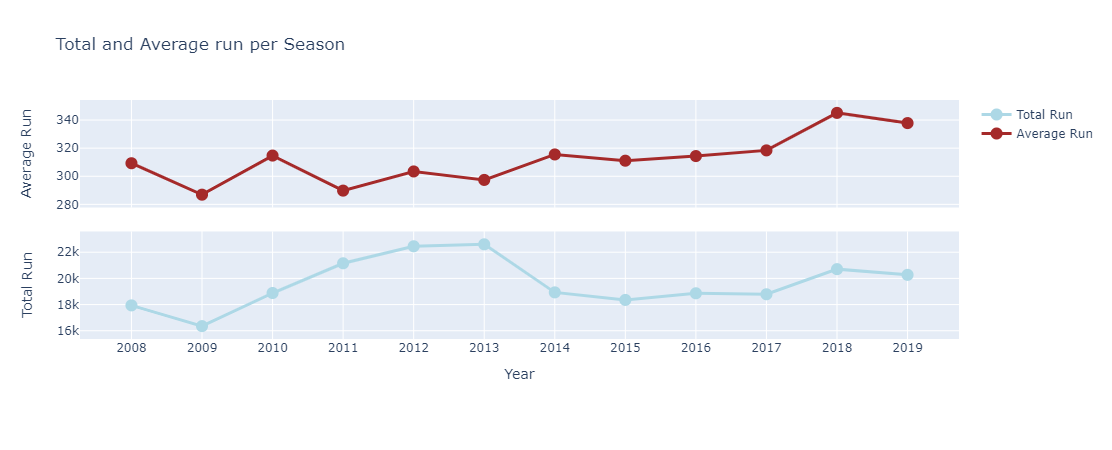

In [114]:
fig = {"data" : [{"x" : season["season"], "y" : season["total_runs"],
                  "name" : "Total Run", "marker" : {"color" : "lightblue", "size": 12},
                  "line": {"width" : 3},"type" : "scatter", "mode" : "lines+markers" },
        
                 {"x" : season["season"], "y" : avgruns_each_season["average_runs_per_match"],
                  "name" : "Average Run", "marker" : {"color" : "brown", "size": 12},
                  "type" : "scatter","line": {"width" : 3}, "mode" : "lines+markers",
                  "xaxis" : "x2", "yaxis" : "y2",}],
       
        "layout" : {"title": "Total and Average run per Season",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1], "anchor" : "x2", "title": "Average Run"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear', "title": "Year"},
                    "yaxis" : {"domain" :[0, .45], "title": "Total Run"}, 'hovermode' : 'x'}}

iplot(fig)

In [115]:
avgruns_each_season.sort_values(by = 'total_runs', ascending = False).head(2)

,season,matches,total_runs,average_runs_per_match
5,2013,76,22602,297.394737
4,2012,74,22453,303.418919


#### 13.2 Run Distribution Over Years


In [116]:

Season_boundaries = batsmen.groupby("season")["batsman_runs"].agg(lambda x : (x == 6).sum()).reset_index()
fours = batsmen.groupby("season")["batsman_runs"].agg(lambda x : (x == 4).sum()).reset_index()
Season_boundaries = Season_boundaries.merge(fours, left_on = 'season', right_on = 'season', how = 'left')
Season_boundaries = Season_boundaries.rename(columns = {'batsman_runs_x' :  '6"s', 'batsman_runs_y' : '4"s'})
Season_boundaries['6"s'] = Season_boundaries['6"s']*6
Season_boundaries['4"s'] = Season_boundaries['4"s']*4
Season_boundaries['total_runs'] = season['total_runs']

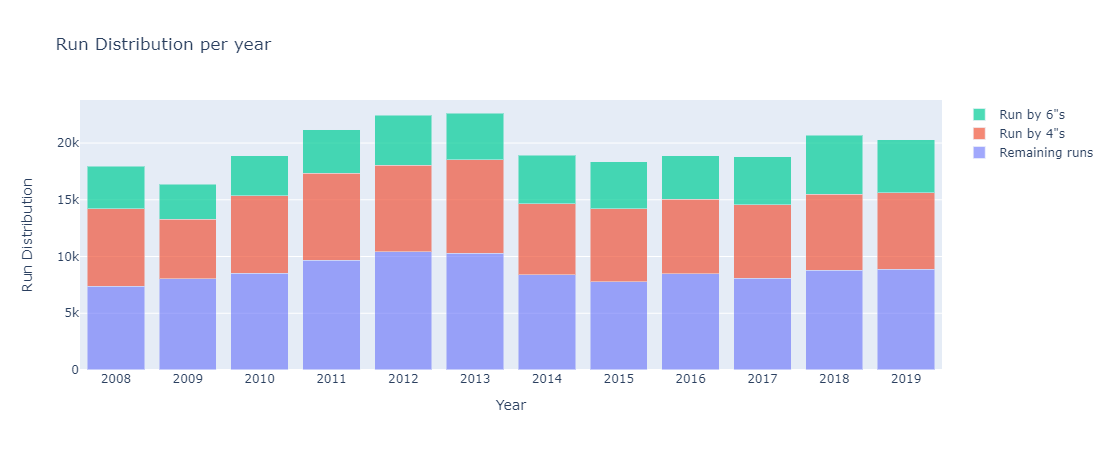

In [117]:
trace1 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['total_runs'] - (Season_boundaries['6"s'] + Season_boundaries['4"s']),
    name = 'Remaining runs', opacity = 0.6)

trace2 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['4"s'],
    name = 'Run by 4"s', opacity = 0.7)

trace3 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['6"s'],
    name = 'Run by 6"s', opacity = 0.7)


data = [trace1, trace2, trace3]
layout = go.Layout(title = "Run Distribution per year", barmode = 'stack', xaxis = dict(tickmode = 'linear', title = "Year"),
                                    yaxis = dict(title = "Run Distribution"), hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Merge 2 Dataset

In [118]:
df = pd.merge(matches, deliveries, left_on='id', right_on='match_id')

In [119]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# 14. Total runs across each season

In [120]:

# Getting total runs from each season
total_run = df.groupby(['season','match_id'])['total_runs'].sum().reset_index()
total_run = total_run.groupby(['season'])['total_runs'].sum().reset_index()


In [121]:
total_run

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


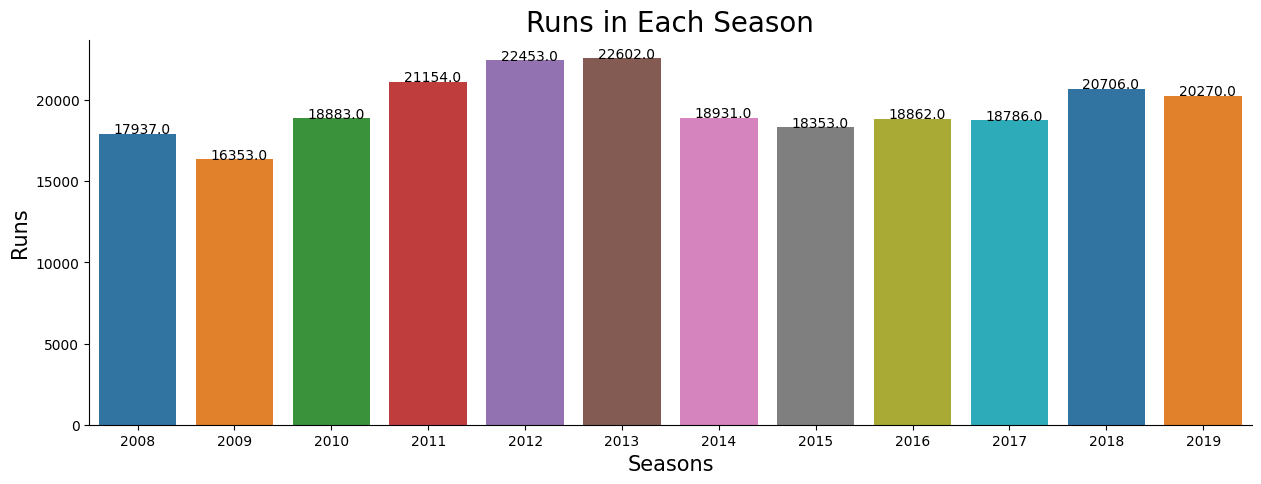

In [122]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='season', y='total_runs',data = total_run, palette = 'tab10')
plt.xlabel('Seasons',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Season',fontsize=20)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))   


plt.show()

### Total Runs score by each Team

In [123]:

# Getting total runs from each teams
team_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()
team_runs = team_runs.groupby(['batting_team'])['total_runs'].sum().reset_index()


In [124]:
team_runs

,batting_team,total_runs
0,Chennai Super Kings,26418
1,Deccan Chargers,11463
2,Delhi Capitals,2630
3,Delhi Daredevils,24388
4,Gujarat Lions,4862
5,Kings XI Punjab,27893
6,Kochi Tuskers Kerala,1901
7,Kolkata Knight Riders,27419
8,Mumbai Indians,29809
9,Pune Warriors,6358


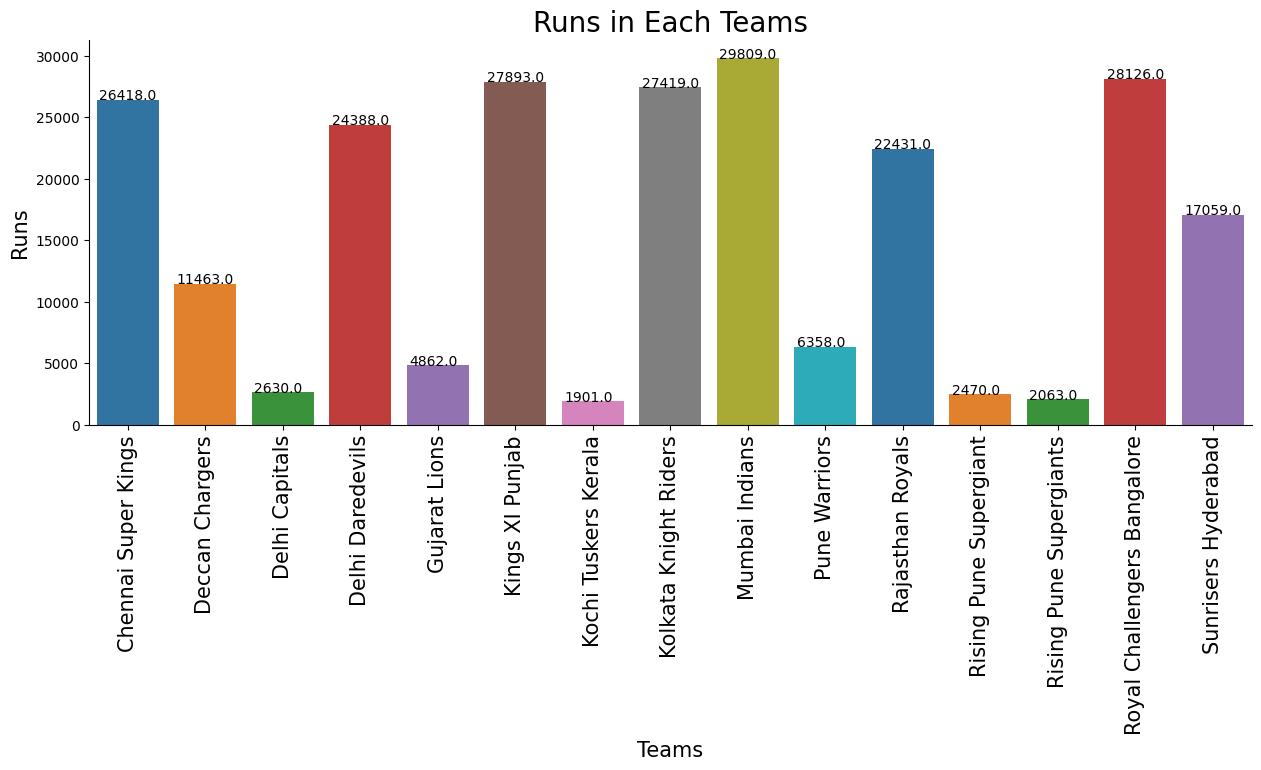

In [125]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batting_team', y='total_runs',data = team_runs, palette = 'tab10')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Teams',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.5))   

plt.show()

### Top 10 Individuals Score

In [126]:

individual  = df.groupby(['batsman','match_id'])['batsman_runs'].sum().reset_index()
individual.sort_values('batsman_runs',axis=0, inplace=True,ascending=False)
individual.drop('match_id',inplace=True,axis=1)
individual = individual[:10]
individual

,batsman,batsman_runs
1826,CH Gayle,175
1423,BB McCullum,158
357,AB de Villiers,133
8167,RR Pant,130
372,AB de Villiers,129
1818,CH Gayle,128
5439,M Vijay,127
2167,DA Warner,126
10660,V Sehwag,122
9723,SR Watson,121


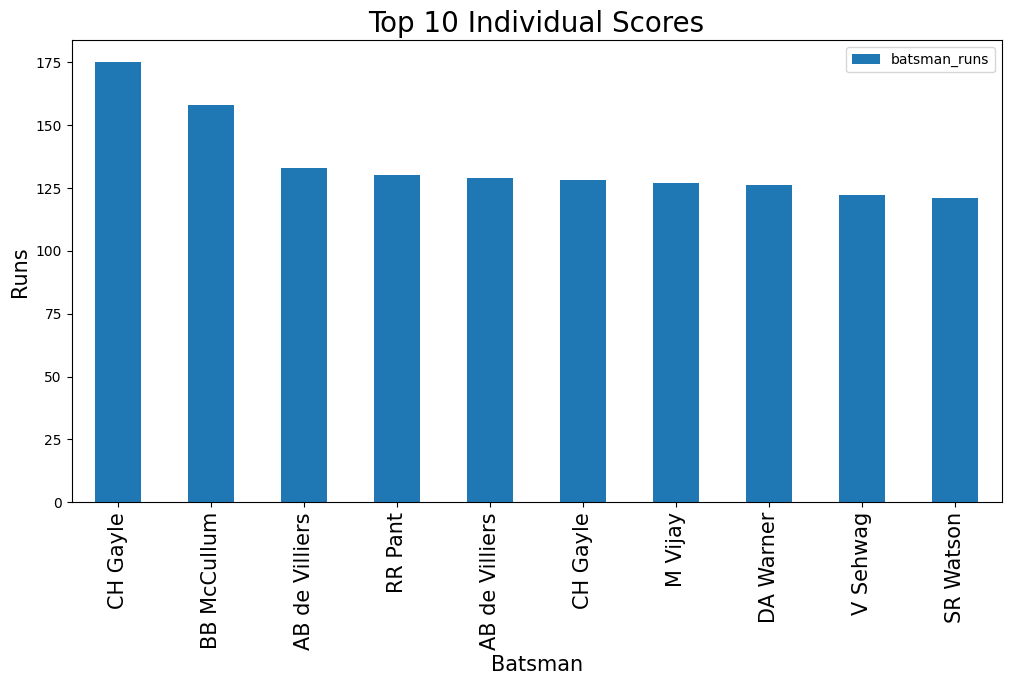

In [127]:
individual.plot(x='batsman', kind='bar', figsize=(12,6))
plt.xlabel('Batsman',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Top 10 Individual Scores',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [128]:
# Runs Distribution By each Team in 1st Inning and 2nd Inning
inning_run = df.groupby(['batting_team','match_id','inning', 'over'])['total_runs'].sum().reset_index()
inning_run = inning_run.groupby(['batting_team','inning'])['total_runs'].sum().reset_index()
inning_run = inning_run.drop(inning_run[inning_run.inning > 2 ].index)
inning_run[0:5]

,batting_team,inning,total_runs
0,Chennai Super Kings,1,14835
1,Chennai Super Kings,2,11574
3,Deccan Chargers,1,6765
4,Deccan Chargers,2,4698
5,Delhi Capitals,1,1019


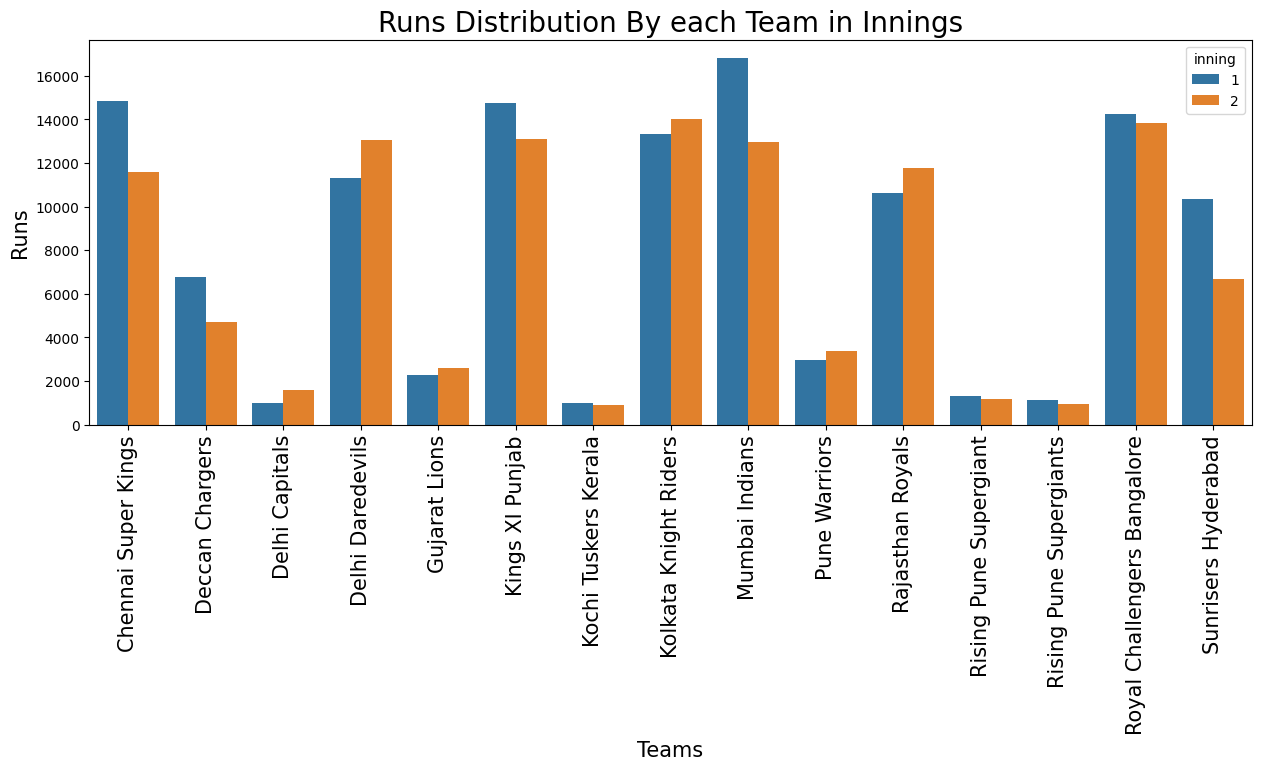

In [129]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batting_team', y='total_runs',data = inning_run,hue='inning')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs Distribution By each Team in Innings',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

###  Top 10 Bowler who bowled Maximum bowls in IPL

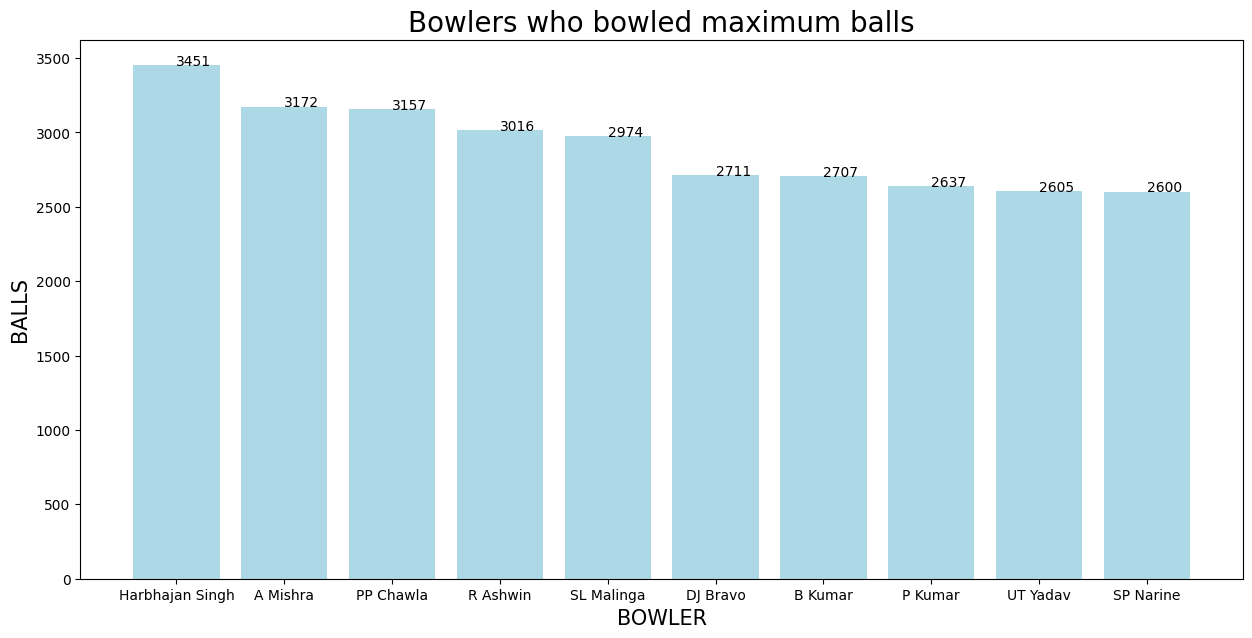

In [130]:

bowler = df['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=bowler.index, height=bowler.values,color='lightblue')

plt.title('Bowlers who bowled maximum balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

### . Top 10 Bowlers with maximum number of Dot Balls

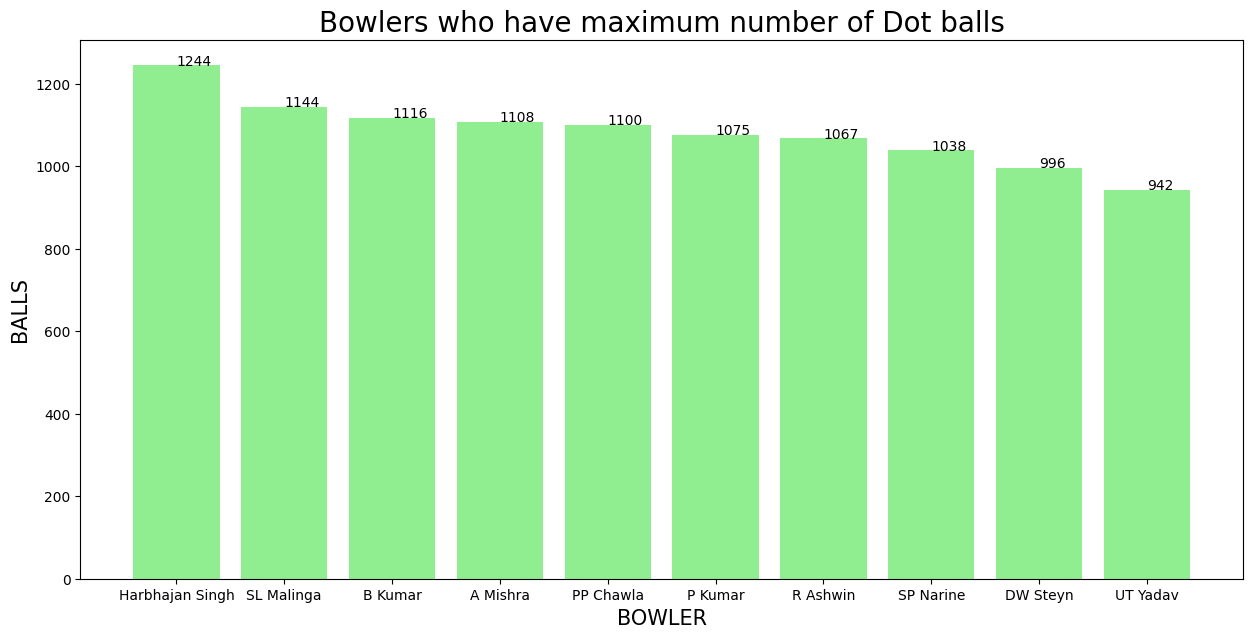

In [131]:

dot_ball = df[df['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=dot_ball.index, height=dot_ball.values,color='lightgreen')

plt.title('Bowlers who have maximum number of Dot balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(dot_ball.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

###  Top 10 Bowlers with maximum number of extras

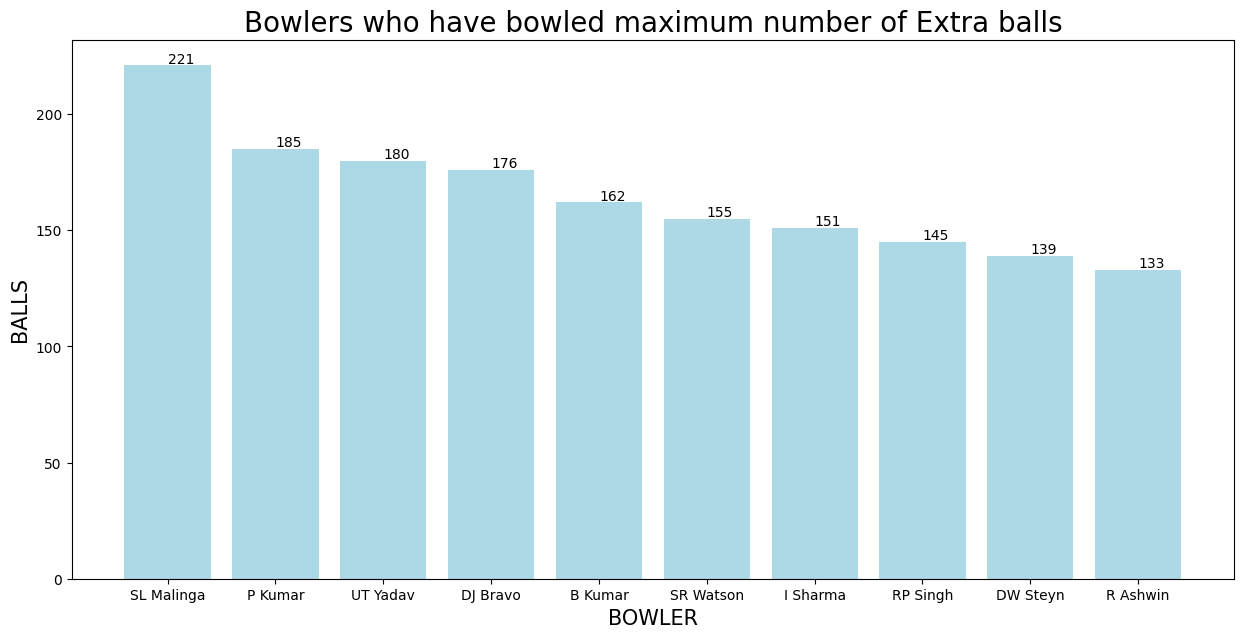

In [132]:

extra_runs = df[df['extra_runs']!=0]
extra_runs = extra_runs['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=extra_runs.index, height=extra_runs.values,color='lightblue')

plt.title('Bowlers who have bowled maximum number of Extra balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(extra_runs.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 